In [71]:
# Will reload modeules after this when they change!
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import pandas as pd
import numpy as np
import itertools
import functools
import importlib
import os
from IPython.display import Image

from nl_00_hmdb_pre import main_loop_0
from sklearn.decomposition import PCA
import umap

from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

import warnings

def action_with_warnings():
    warnings.warn("should not appear")

In [ ]:
# Regression:
from nl_03_filter_model_score_reg import filter_split_model_score

In [ ]:
# Binary classification:
from nl_03_filter_model_score import filter_split_model_score

### This script runs the neutral loss scripts for MALDI IMS data

Steps:
1. Generation of core metabolome database.  See:
    PycharmProjects/core_metabolome/core_metabolome_db.ipynb
2. 

1. nl_00 Calculates Mordred descriptors and FP4 fingerprints as bits.
2. nl_01 Filter HMDB_db for observed and parses METASPACE output.
3. nl_02 Joins HMDB_db and METASPACE output.
4. nl_03 Filters and searchs with direct and machine learning models.

### To do:
5. nl_04 deep learning: executing on toy data, change to regression

### Observations:
1. 2912/3333 datasets a) did not error and b) had at least one id.  
2. 2543/2868 datasets w/10 or more ID's.  Obs: 557,508/559,002
3. 644,094 values identifications, the dataset with the most identifications had 5,820 and mean was 221 (median 131).  Re calculate...
4. The data did not pass the Shapiro-Wilk test for normality, and nonparametrical statistics should be used.

In [5]:
### Off-line steps:

# Generation of core metabolome database.  See:
'http://localhost:8888/notebooks/PycharmProjects/core_metabolome/core_metabolome_db.ipynb'
core_metabolome = '/Users/dis/PycharmProjects/neutral_loss/good_nl_reports/core_metabolome_v2.pickle'

# Identification of good quality datasets.
'http://localhost:8888/notebooks/PycharmProjects/neutral_loss/good_nl_reports/high_quality_data_investigations.ipynb'
good_ds_ids = '/Users/dis/PycharmProjects/neutral_loss/good_nl_reports/good_ds_2020_Feb_25.txt'

# Good datasets were researched from the beta server.  Run 1x w/ "reprocess = True" and
# "reprocess_not_downloading = True".  Run again w/False.  See:
'http://localhost:8888/notebooks/PycharmProjects/neutral_loss/good_nl_reports/Beta_server_neutral_losses_mass_search.ipynb'
beta_variables = {'NEUTRAL_LOSSES': ['-H2O'], 'MAX_FDR': 0.5, 'molDBs': 'core_metabolome_v2'}
path_to_reports = 'tbd'

In [29]:
# nl_00: Generates FP4 descriptors ('bits') and Mordred descriptors. 
# 900 seconds to reprocess everything on 13k. 15s without reprocessing.

db_out_0 = 'databases/core_metabolome_out.pickle'
db_in_0 = core_metabolome
dfs = main_loop_0(db_out_0, db_in_0, True, False)

db_df = dfs[0]
bits_df = dfs[1]
mord_norm_df = dfs[2]

Elapsed time:

15.870030164718628

Executed without error

databases/core_metabolome_out.pickle


In [64]:
def pca_plot(df, title):
    # https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(df)
    p_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])
    
    x = p_df.pc_1
    y = p_df.pc_2
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize=15)
    ax.set_ylabel('Principal Component 2', fontsize=15)
    ax.set_title(title, fontsize = 20)
    ax.scatter(x, y, c=z, s=50)
    ax.grid()

In [88]:
def umap_plot(df, title, binary_flag=False):
    # https://umap-learn.readthedocs.io/en/latest/basic_usage.html
    if binary_flag is True:
        reducer = umap.UMAP(metric='jaccard')
    else:
        reducer = umap.UMAP()
        
    embedding = reducer.fit_transform(df)
    p_df = pd.DataFrame(data = embedding, columns = ['umap_1', 'umap_2'])
    
    x = p_df.umap_1
    y = p_df.umap_2
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('umap_1', fontsize=15)
    ax.set_ylabel('umap_2', fontsize=15)
    ax.set_title(title, fontsize = 20)
    ax.scatter(x, y, c=z, s=50)
    ax.grid()

In [ ]:
# umap umap-learn
# Map neutral loss data onto these plots
# Fingerprints + features
# Make all by all distance matrix for each.  Pairwise(cos distance)
# Correlate function?  Pierson?
# Cluster PCA plot, assign colors, then revers

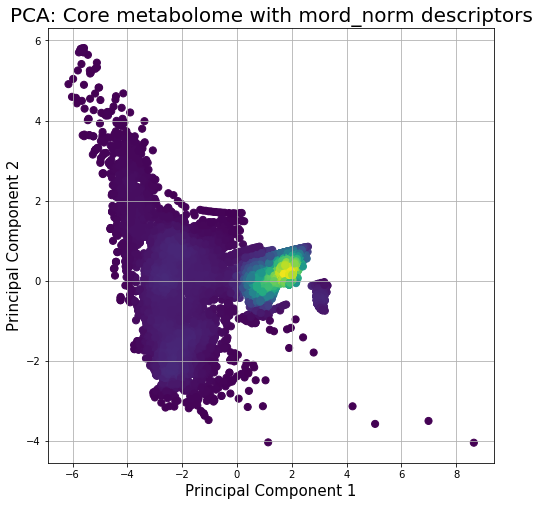

In [75]:
pca_plot(mord_norm_df.iloc[:,:-2], 'PCA: Core metabolome with mord_norm descriptors')

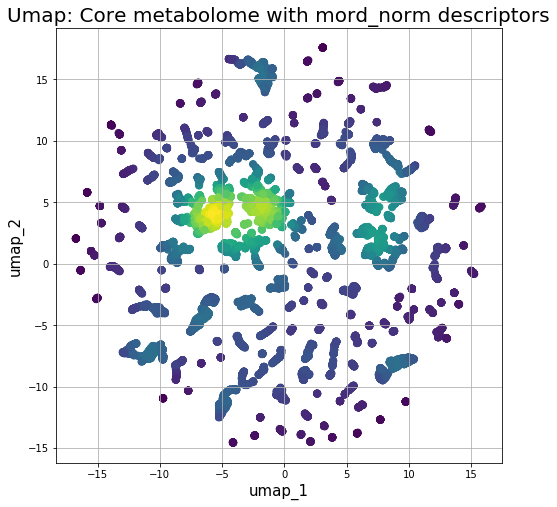

In [90]:
with warnings.catch_warnings(record=True):
    action_with_warnings()
    umap_plot(mord_norm_df.iloc[:,:-2], 'Umap: Core metabolome with mord_norm descriptors')

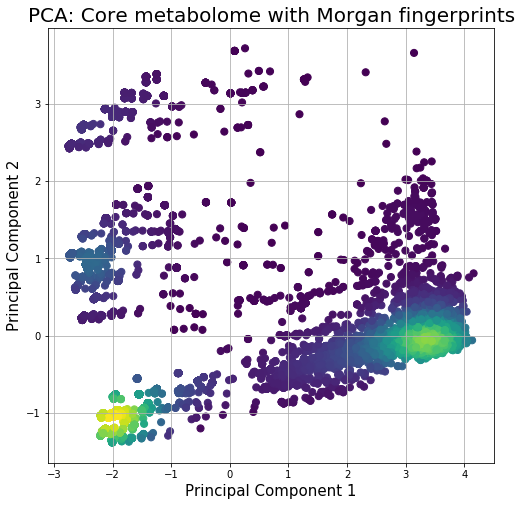

In [68]:
b = pd.DataFrame(list(bits_df.bits))
pca_plot(b, 'PCA: Core metabolome with Morgan fingerprints')

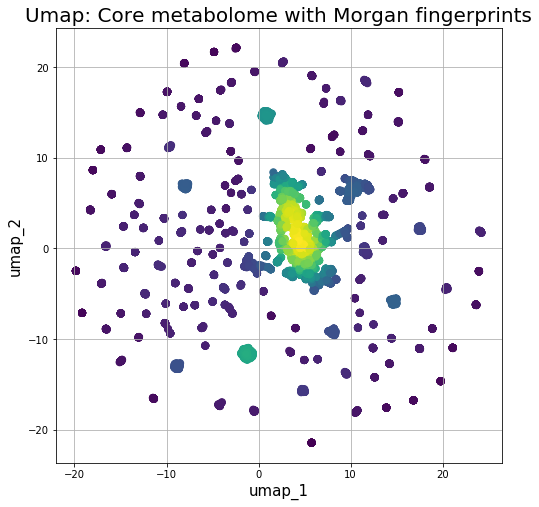

In [89]:
with warnings.catch_warnings(record=True):
    action_with_warnings()
    umap_plot(b, 'Umap: Core metabolome with Morgan fingerprints', binary_flag=True)

In [105]:
df1 = pd.DataFrame(list(bits_df.bits)).reset_index()
df2 = mord_norm_df.iloc[:,:-2].reset_index()
mord_morg_df = pd.concat([df1, df2], axis=1).astype(float)

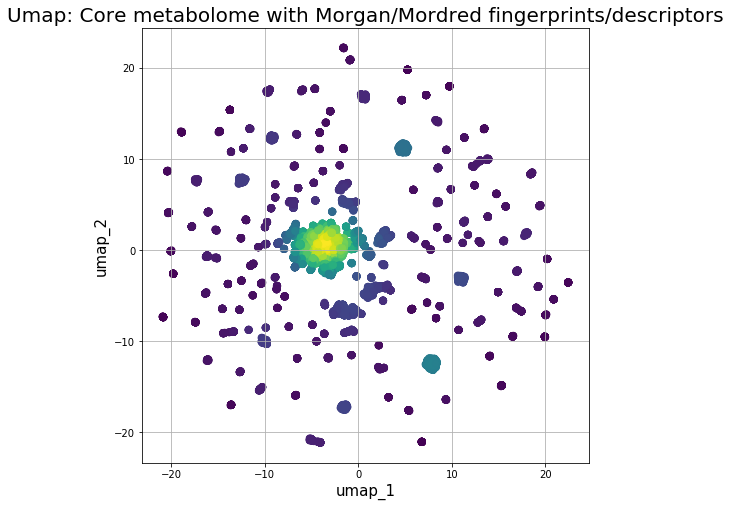

In [106]:
with warnings.catch_warnings(record=True):
    action_with_warnings()
    umap_plot(b, 'Umap: Core metabolome with Morgan/Mordred fingerprints/descriptors', binary_flag=False)